In [1]:
# import libraries
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load dataset
mnist=fetch_openml('mnist_784')
x,y=mnist['data'],mnist['target']

C:\Users\Student\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# visualize dataset
x=np.array(x)
y=np.array(y)
y=y.astype('int')

In [4]:
# shape of x,y
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
# Split dataset into train.test
x_train,x_test=x[:60000],x[60000:700000]
y_train,y_test=y[:60000],y[60000:70000]

In [7]:
# size of train and test dataset
x_train.shape

(60000, 784)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

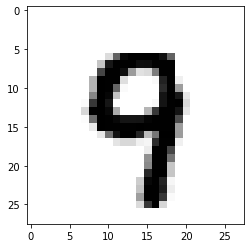

In [10]:
# Data visualization
some_image=x[520]
some_image=some_image.reshape(28,28)
plt.imshow(some_image,cmap=matplotlib.cm.binary,interpolation ='nearest')

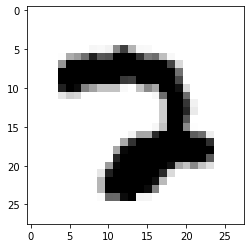

In [11]:
some_image=x[120]
some_image=some_image.reshape(28,28)
plt.imshow(some_image,cmap=matplotlib.cm.binary,interpolation ='nearest')

# Bagging Algorithm

In [12]:
def bagging():
    indexes=np.random.randint(0,len(x_train),len(x_train))
    bag=x_train[indexes]
    target=y_train[indexes]
    return(bag,target)

In [13]:
# Bag-1
bag1=bagging()
print(bag1[0].shape,'\n',bag1[1].shape)

(60000, 784) 
 (60000,)


In [14]:
# Training bag-1
dtc1=DecisionTreeClassifier()
dtc1.fit(bag1[0],bag1[1])

DecisionTreeClassifier()

In [15]:
# Bag-2
bag2=bagging()
print(bag2[0].shape,'\n',bag2[1].shape)

(60000, 784) 
 (60000,)


In [16]:
# Training bag-2
dtc2=DecisionTreeClassifier()
dtc2.fit(bag2[0],bag2[1])

DecisionTreeClassifier()

In [17]:
# Bag-3
bag3=bagging()
print(bag3[0].shape,'\n',bag3[1].shape)

(60000, 784) 
 (60000,)


In [18]:
# Training bag-3
dtc3=DecisionTreeClassifier()
dtc3.fit(bag3[0],bag3[1])

DecisionTreeClassifier()

In [19]:
# Combining the results of all 3 classifiers
pred_1=dtc1.predict(x_test)
pred_2=dtc2.predict(x_test)
pred_3=dtc3.predict(x_test)

In [20]:
# Majority voting of 3 predictions
y_pred=[]
for i in range(len(x_test)):
    node=[pred_1[i],pred_2[i],pred_3[i]]
    majority_vote=max(node,key=node.count)
    y_pred.append(majority_vote)
y_pred=np.array(y_pred)

In [21]:
# Shape and elements of prediction
y_pred.shape

(10000,)

In [22]:
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

# Accuaracy of Bagging Model

In [23]:
# Final Accuracy
print("Accuracy = ",accuracy_score(y_test,y_pred))

Accuracy =  0.8996
